## Imports

In [185]:
# pip install --upgrade scikit-learn

In [186]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.1.3
Sklearn  1.0.2


## Get the dataset
- **CLOUD = True**: Download dataset from Kaggle. Necesary for cloud enviroments like COLAB. **Specify your [kaggle credentials](https://www.kaggle.com/docs/api)**.
- **CLOUD = False**: Get the dataset from your local machine. **Specify the data path**.

In [187]:
DATA_PATH = "../../Datasets/Tabular/titanic/"

## Load data

In [188]:
df      = pd.read_csv("C:\\Users\\ritth\\code\\Strive\\Strive-Exercises\\Chapter 02\\08. Robust ML\\titanic\\train.csv", index_col = 'PassengerId')
df_test = pd.read_csv("C:\\Users\\ritth\\code\\Strive\\Strive-Exercises\\Chapter 02\\08. Robust ML\\titanic\\test.csv",  index_col = 'PassengerId')

print("Train DataFrame:", df.shape)
print("Test DataFrame: ", df_test.shape)

Train DataFrame: (891, 11)
Test DataFrame:  (418, 10)


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [190]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [191]:
df[:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [192]:
df_test.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1147,3,"MacKay, Mr. George William",male,NaN,0,0,C.A. 42795,7.5500,NaN,S
968,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S
997,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.5250,NaN,S
1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
981,2,"Wells, Master. Ralph Lester",male,2.0,1,1,29103,23.0000,NaN,S


## Check missings

In [193]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

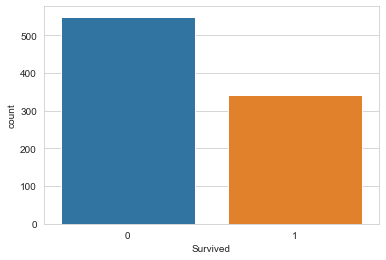

In [307]:
sb.countplot(x ='Survived', data = df)

<AxesSubplot:xlabel='Survived', ylabel='Density'>

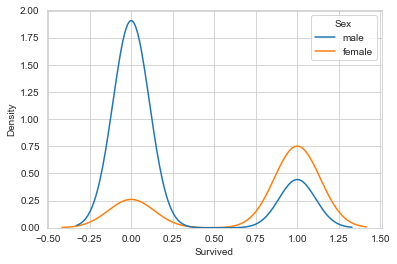

In [338]:
sb.kdeplot(x ='Survived', hue ='Sex', data = df)

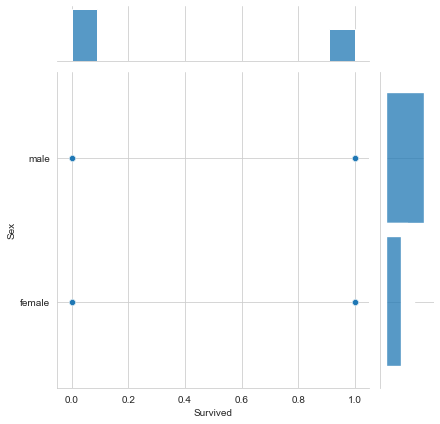

In [340]:
sb.jointplot(x ='Survived', y ='Sex', data = df)

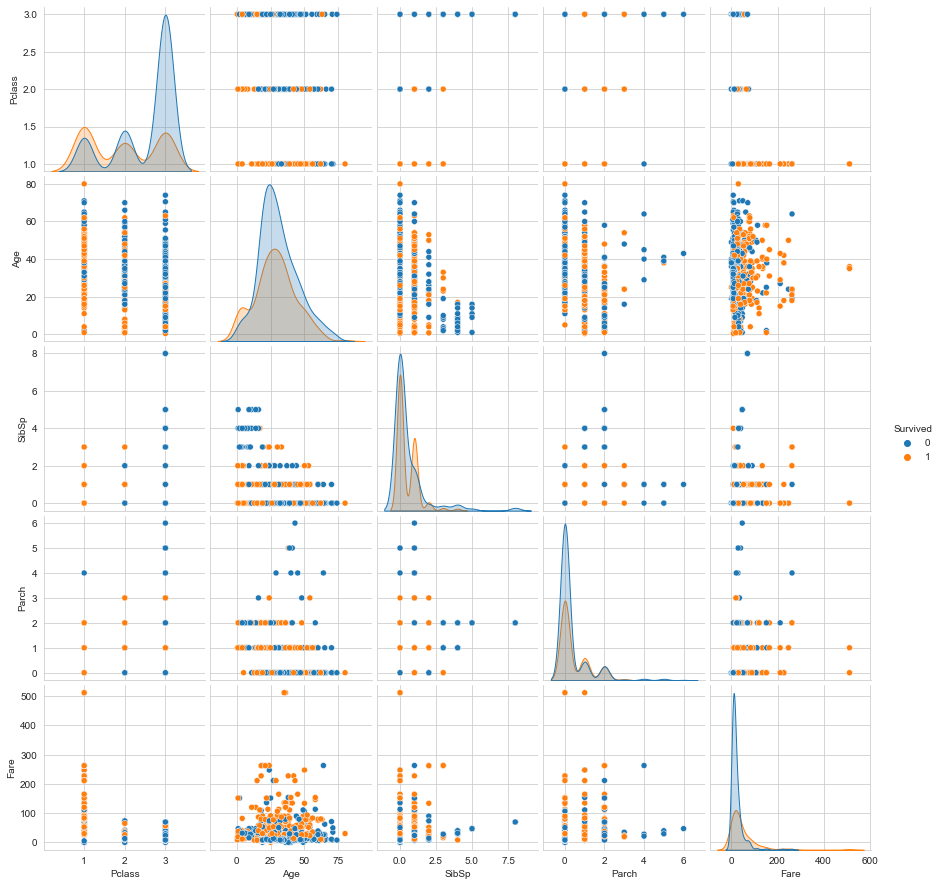

In [343]:
sb.pairplot(df, hue='Survived', height=2.5)

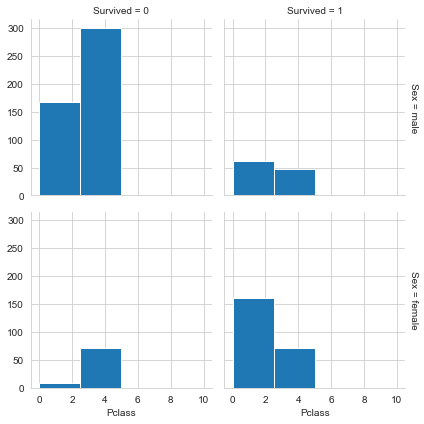

In [353]:
grid = sb.FacetGrid(df, row="Sex", col="Survived", margin_titles=True)
grid.map(plt.hist, "Pclass", bins=np.linspace(0, 10, 5))

<AxesSubplot:xlabel='Survived', ylabel='count'>

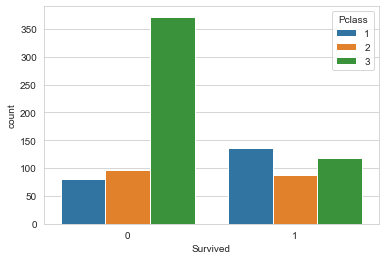

In [309]:
sb.countplot(x ='Survived', hue ='Pclass', data = df)

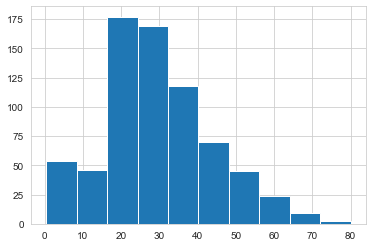

In [311]:
plt.hist(df['Age'])
plt.show()

<AxesSubplot:ylabel='PassengerId'>

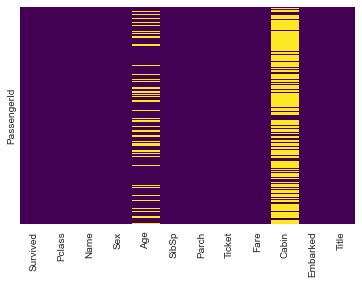

In [354]:
sb.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap ='viridis' )

In [194]:
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

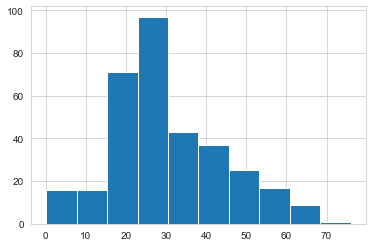

In [312]:
plt.hist(df_test['Age'])
plt.show()

<AxesSubplot:ylabel='PassengerId'>

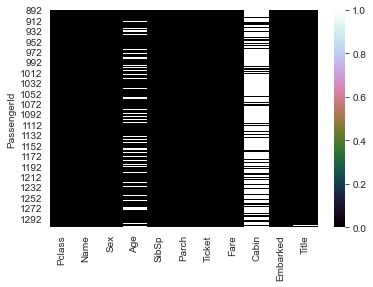

In [322]:
sb.heatmap(df_test.isnull(), cmap = "cubehelix")

# Exercise 1 (2pts):
Extract the title (Mr, Mrs, ... ) from the "Name" column.

Tips:
- split(',')[1] to get the 2nd part, and remove the surnamename
- split('.')[0] to get the 1str part, and remove the name

In [195]:
# CODE HERE get_Title_from_Name funtion
# Create this function using lambda (not def)

get_Title_from_Name = df['Name'].apply(lambda df: df.split('.')[0].split(',')[1].strip())
df['Title'] = (get_Title_from_Name)


In [196]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
the Countess      1
Mme               1
Sir               1
Jonkheer          1
Don               1
Lady              1
Ms                1
Name: Title, dtype: int64

In [197]:
df['Title'].values[2]

'Miss'

In [198]:
df['Title'].values[0] == "Mr"

True

In [199]:
df_test['Title'] = df_test['Name'].apply(lambda df_test: df_test.split('.')[0].split(',')[1].strip())

In [200]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [201]:
print(df_test['Title'].values[414])

Dona


In [202]:
df_test['Title'].values[414] == "Dona"

True

In [203]:
assert df['Title'].values[0] == "Mr"
assert df['Title'].values[1] == "Mrs"
assert df['Title'].values[2] == "Miss"

assert df_test['Title'].values[0] == "Mr"
assert df_test['Title'].values[1] == "Mrs"
assert df_test['Title'].values[414] == "Dona"

# Exercise 2 (1pts):
Apply the title_dictionary to get a better information about the title. You have to overwrite the Title variable.

In [204]:
title_dictionary = {
                        "Capt": "Officer",
                        "Col": "Officer",
                        "Major": "Officer",
                        "Jonkheer": "Royalty",
                        "Don": "Royalty",
                        "Sir" : "Royalty",
                        "Dr": "Officer",
                        "Rev": "Officer",
                        "the Countess":"Royalty",
                        "Mme": "Mrs",
                        "Mlle": "Miss",
                        "Ms": "Mrs",
                        "Mr" : "Mr",
                        "Mrs" : "Mrs",
                        "Miss" : "Miss",
                        "Master" : "Master",
                        "Lady" : "Royalty"
                                                }

In [205]:
# Use map to apply the prevous dict

df["Title"] =  df['Title'].map(title_dictionary)
df_test["Title"] = df_test['Title'].map(title_dictionary)



In [206]:
df['Title'].values[886]

'Officer'

In [207]:
assert df['Title'].values[886] == "Officer"
assert df_test['Title'].values[417] == "Master"

# Exercise OPTINAL (0pts):
Try to extract some information from the feature **Ticket**. Search on Internet if that colum has some kind of information.

# Exercise OPTIONAL (0pts):
Try to extract some information from the feature **Cabin**. Search on Internet if that colum has some kind of information.

# Preprocessing
For X data, notice that...
- We drop Survived because is the target variable
- We drop Name because we have extracted the Title: Mr, Mrs, ...
- We drop Ticket because it has no information -> see df.Ticket.nunique()
- We drop Cabin because it has a lot of missings (77% are missings)

Then, we identify **numerical** variables and **categorical** variables,

In [228]:
x = df.drop(columns=["Survived", 'Name', 'Ticket', 'Cabin']) # X DATA (WILL BE TRAIN+VALID DATA)
y = df["Survived"] # 0 = No, 1 = Yes

x_test = df_test.drop(columns=['Name', 'Ticket', 'Cabin']) # # X_TEST DATA (NEW DATA)
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,Mr
893,3,female,47.0,1,0,7.0000,S,Mrs
894,2,male,62.0,0,0,9.6875,Q,Mr
895,3,male,27.0,0,0,8.6625,S,Mr
896,3,female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S,Mr
1306,1,female,39.0,0,0,108.9000,C,NaN
1307,3,male,38.5,0,0,7.2500,S,Mr


In [229]:
print(x.shape, y.shape)

(891, 8) (891,)


In [230]:
y[:2]

PassengerId
1    0
2    1
Name: Survived, dtype: int64

In [325]:
# to get categorical data
x.select_dtypes(include=[object]).columns.values.tolist()

['Sex', 'Embarked', 'Title']

In [326]:
# to get numerical data
x.select_dtypes(exclude=[object]).columns.values.tolist()

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [231]:
cat_vars  = ['Sex', 'Embarked', 'Title']         # x.select_dtypes(include=[object]).columns.values.tolist()
num_vars  = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age'] # x.select_dtypes(exclude=[object]).columns.values.tolist()

print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']

Categorical features:
 ['Sex', 'Embarked', 'Title']


# Exercise 3 (2pts):
Create a **ColumnTransformer for Tree Models**. You need to create 2 pipelines (one for numerical and other for categories). Remember:
- Categorical pipeline: Some SimpleImputer -> Some Encoder
- Numerical pipeline: Some SimpleImputer -> NO Encoder

In [334]:
"""
num_preprocessing = pipeline.Pipeline(steps=[
  # Some SimpleImputer here
])

cat_preporcessing = pipeline.Pipeline(steps=[
  # Some SimpleImputer here
  # Some Encoder here. Remember to handle_unknown
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_preprocessing, num_vars),
    ('cat', cat_preporcessing, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro
"""
set_config(display='diagram')

num_preprocessing = pipeline.Pipeline( [('imp', impute.SimpleImputer()) ] )
  


cat_preporcessing = pipeline.Pipeline( [
                                         ('ordinal', preprocessing.OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = 10)),
                                         ('imp', impute.SimpleImputer())
                                              ] )

# Drop other vars not specified in num_vars or cat_vars
tree_prepro = compose.ColumnTransformer( [
                                          ('num', num_preprocessing, num_vars),
                                          ('cat', cat_preporcessing, cat_vars)], 
                                          remainder = 'drop') 



num_4_treeModels = num_preprocessing
cat_4_treeModels = cat_preporcessing

In [244]:
assert type(tree_prepro)      is compose._column_transformer.ColumnTransformer
assert type(num_4_treeModels) is pipeline.Pipeline
assert type(cat_4_treeModels) is pipeline.Pipeline
assert len(num_4_treeModels) == 1
assert len(cat_4_treeModels) == 2

# Exercise 4 (1pts):
1. Complete the diccionary with some Tree Models.
2. Then we put each model in a Pipeline where:
   - first is the prepocessing with the column Transformer
   - Then is the Tree model
3. Display the fullpipeline of the LGBMClassifier

In [245]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

In [331]:
"""
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":
  "Random Forest":
  "AdaBoost":
  "Skl GBM":
  "Skl HistGBM":
  "XGBoost":
  "LightGBM":
  "CatBoost":
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
tree_classifiers["LightGBM"]
"""

set_config(display='diagram')

tree_classifiers = {
                      "Decision Tree": DecisionTreeClassifier(random_state=0),
                      "Extra Trees": ExtraTreesClassifier(random_state=0),
                      "Random Forest": RandomForestClassifier(random_state=0),
                      "AdaBoost": AdaBoostClassifier(random_state=0),
                      "Skl GBM": GradientBoostingClassifier(random_state=0),
                      "Skl HistGBM": HistGradientBoostingClassifier(random_state=0),
                      "XGBoost": XGBClassifier(),
                      "LightGBM": LGBMClassifier(random_state=0),
                      "CatBoost": CatBoostClassifier(random_state=0)
                      }
                      

# .items()return both keys and values in dictionary(tree_classifiers)
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
tree_classifiers["LightGBM"]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer())]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=10)),
                                                                  ('imp',
                                                                   SimpleImputer())]),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=0))])

In [282]:
for pipe in tree_classifiers.values():
    assert type(pipe) is pipeline.Pipeline

# Exercise 5 (3pts):
Define a simple split validation strategy with:
- 80% for train
- 20% for validation
- With stratification
- random_state=0

And train all the models in a for loop

In [283]:
# split
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(712, 8) (179, 8) (712,) (179,)


In [284]:
"""
for model_name, model in tree_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    
    # GET PREDICTIONS USING x_val
    pred = # CODE HERE

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
"""
# dataframe
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    
    # GET PREDICTIONS USING x_val
    model.fit(x_train, y_train)
    pred =  model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100, # balanced is used to know the inbalanced data stored
                              "Time":     total_time},
                              ignore_index = True)




results_ord = results.sort_values(by = ['Accuracy'], ascending = False, ignore_index = True)
results_ord.index += 1 
results_ord.style.bar(subset = ['Accuracy', 'Bal Acc.'], vmin = 0, vmax = 100, color ='#5fba7d')

C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008911
0:	learn: 0.6896726	total: 1.52ms	remaining: 1.52s
1:	learn: 0.6836170	total: 4.8ms	remaining: 2.4s
2:	learn: 0.6779585	total: 8.93ms	remaining: 2.97s
3:	learn: 0.6721305	total: 12.4ms	remaining: 3.09s
4:	learn: 0.6654664	total: 16.4ms	remaining: 3.27s
5:	learn: 0.6597188	total: 19.5ms	remaining: 3.23s
6:	learn: 0.6539473	total: 23.8ms	remaining: 3.38s
7:	learn: 0.6493276	total: 26ms	remaining: 3.22s
8:	learn: 0.6440785	total: 29.6ms	remaining: 3.26s
9:	learn: 0.6411711	total: 31.4ms	remaining: 3.11s
10:	learn: 0.6360811	total: 33.9ms	remaining: 3.05s
11:	learn: 0.6309393	total: 36.9ms	remaining: 3.04s
12:	learn: 0.6256694	total: 39.9ms	remaining: 3.03s
13:	learn: 0.621057

,Model,Accuracy,Bal Acc.,Time
1,Skl GBM,84.916201,82.325428,0.257020
2,XGBoost,81.564246,78.787879,0.317025
3,Skl HistGBM,81.005587,78.603426,1.761895
4,LightGBM,81.005587,78.333333,0.405030
5,CatBoost,81.005587,78.333333,4.929762
6,AdaBoost,79.888268,77.964427,0.220532
7,Random Forest,78.770950,76.245059,0.627973
8,Extra Trees,77.653631,75.065876,0.544118
9,Decision Tree,77.094972,75.421607,0.104010


In [285]:
results_ord["Accuracy"].min()

77.09497206703911

In [286]:
results_ord["Bal Acc."].min()

75.06587615283267

In [287]:
results_ord["Bal Acc."].min() > 75

True

In [288]:
assert results_ord["Accuracy"].min() > 75
assert results_ord["Bal Acc."].min() > 75
assert len(results_ord) == 9

# Exercise 6 (3pts):
Define a 10 Fold cross validation strategy with:
- With stratification
- shuffle=True
- random_state=0

And train all the models in a for loop.

Tip you can use **[cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)** for both training and predict with 

In [289]:
skf = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
skf

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [292]:
"""
for model_name, model in tree_classifiers.items():
    start_time = time.time()
        
    # TRAIN AND GET PREDICTIONS USING cross_val_predict() and x,y
    pred = # CODE HERE

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
"""


results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})



for model_name, model in tree_classifiers.items():
    start_time = time.time()
        

    # TRAIN AND GET PREDICTIONS USING cross_val_predict() and x,y
    pred = model_selection.cross_val_predict(model, x, y, cv = skf)


    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)



results_ord = results.sort_values(by = ['Accuracy'], ascending = False, ignore_index = True)
results_ord.index += 1 
results_ord.style.bar(subset = ['Accuracy', 'Bal Acc.'], vmin = 0, vmax = 100, color ='#5fba7d')

C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.009371
0:	learn: 0.6897445	total: 1.54ms	remaining: 1.54s
1:	learn: 0.6859893	total: 4.07ms	remaining: 2.03s
2:	learn: 0.6793726	total: 8.66ms	remaining: 2.88s
3:	learn: 0.6732200	total: 11.7ms	remaining: 2.91s
4:	learn: 0.6683890	total: 13.7ms	remaining: 2.72s
5:	learn: 0.6620413	total: 16.9ms	remaining: 2.8s
6:	learn: 0.6558555	total: 19.9ms	remaining: 2.82s
7:	learn: 0.6512902	total: 22.6ms	remaining: 2.8s
8:	learn: 0.6454102	total: 25.2ms	remaining: 2.77s
9:	learn: 0.6398436	total: 28.9ms	remaining: 2.86s
10:	learn: 0.6345700	total: 31.7ms	remaining: 2.85s
11:	learn: 0.6291178	total: 34.3ms	remaining: 2.82s
12:	learn: 0.6237355	total: 36.9ms	remaining: 2.8s
13:	learn: 0.61939

,Model,Accuracy,Bal Acc.,Time
1,Skl GBM,83.277217,81.248202,2.592714
2,CatBoost,83.052750,80.900681,39.494776
3,Skl HistGBM,82.828283,81.159524,13.653351
4,LightGBM,82.491582,80.886300,1.864141
5,XGBoost,82.042649,80.411753,3.097739
6,Random Forest,81.257015,79.774231,6.064670
7,AdaBoost,81.032548,79.757454,2.488697
8,Extra Trees,80.471380,79.026460,5.010842
9,Decision Tree,79.124579,77.823315,0.721057


In [294]:
assert results_ord["Accuracy"].min() > 75
assert results_ord["Bal Acc."].min() > 75
assert len(results_ord) == 9

# Exercise 7.1
Train with all data the best model

In [296]:
# best_model = tree_classifiers["SELECT MY BEST MODEL HERE"]
best_model = tree_classifiers["Skl GBM"]

# Fit best model with all data
best_model.fit(x, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer())]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=10)),
                                                                  ('imp',
                                                                   SimpleImputer())]),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=0))])

# Exercise 7.2 (2pts)
With your best model, generate the predicitions for test data (x_test)

In [297]:
# test_pred = # Get the predictions for x_test

test_pred = best_model.predict(x_test)

In [298]:
assert len(test_pred) == 418
assert np.unique(test_pred).tolist() == [0,1]

# Exercise 7.3

Submit to kaggle.

- You can use the kaggle command line app. Check https://github.com/Kaggle/kaggle-api

In [299]:
sub = pd.DataFrame(test_pred, index=x_test.index, columns=["Survived"])
sub.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [300]:
sub.to_csv("sub.csv")

In [302]:
!kaggle competitions submit -c titanic -f sub.csv -m "My submission message"

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
